Machine Learning Individual Project: Banking Customer Churn Prediction


Name: Lai Khanh Nam

Dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data


Part 1: Data Inspection and Processing 

In [1]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve, f1_score


#import random forest classifier
from sklearn.ensemble import RandomForestClassifier




In [2]:
#Load dataset
data = pd.read_csv('BankChurners.csv')

data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
duplicates = data.duplicated()
print(duplicates.sum())

0


In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

Part 2: EDA

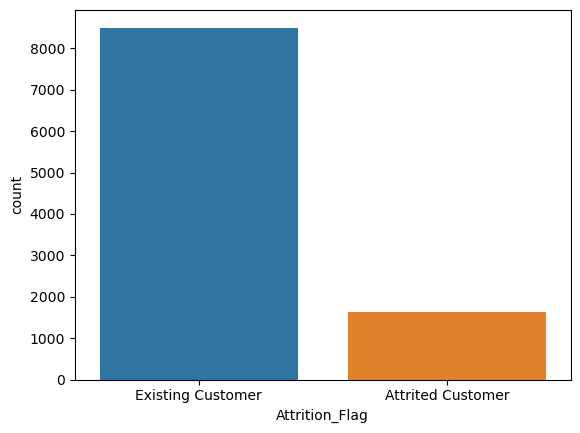

In [8]:
#Inspecting the target variable

sns.countplot(data=data, x='Attrition_Flag', hue='Attrition_Flag')
plt.show()


We have a lot more existing customers that attrited customer, stratified k-fold should be used in cross-validation to evaluate model

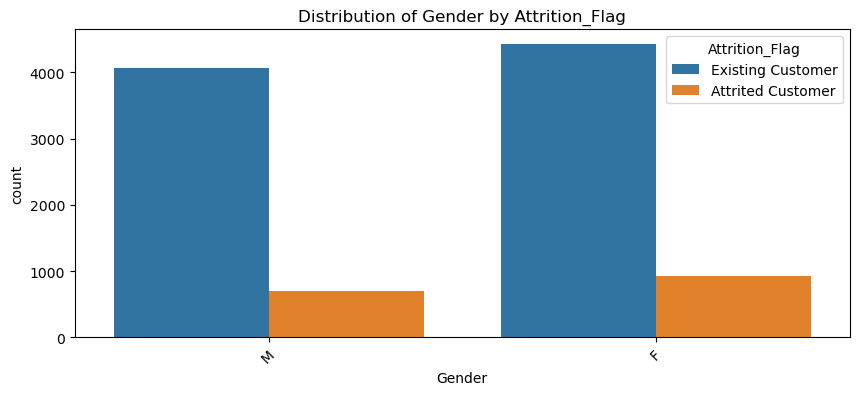

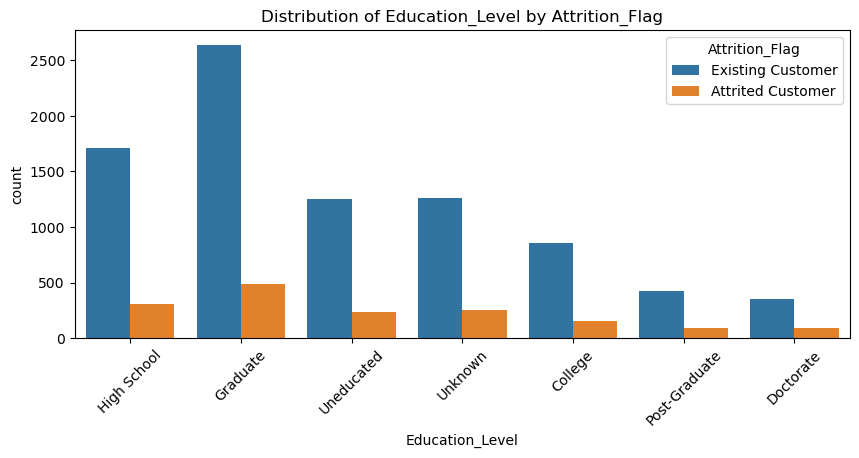

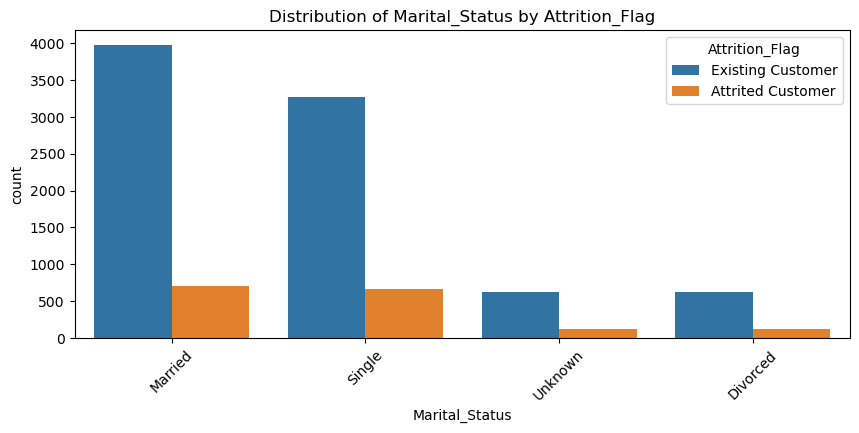

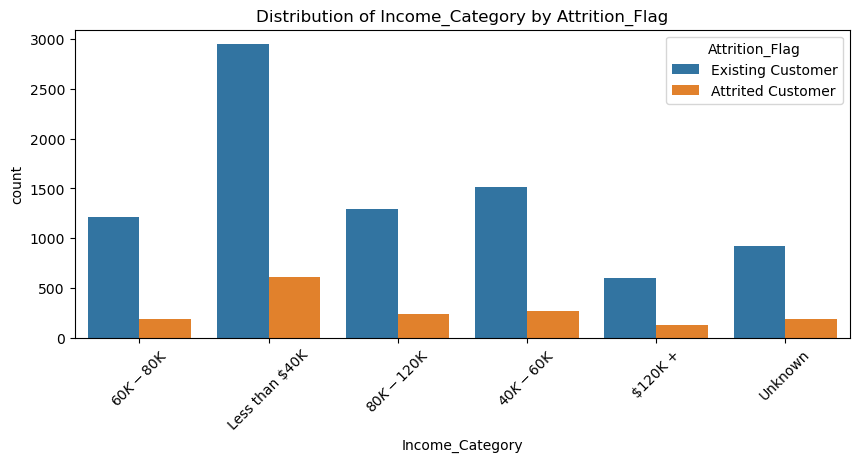

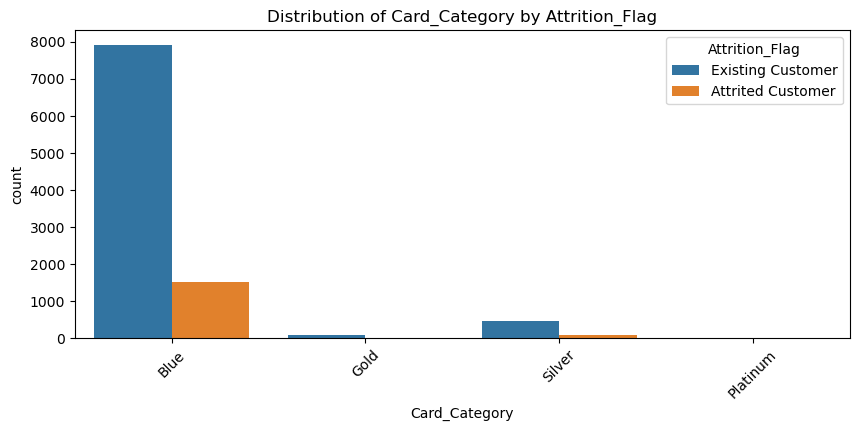

In [9]:
#inspecting categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Attrition_Flag')  
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature, hue='Attrition_Flag')
    plt.title(f'Distribution of {feature} by Attrition_Flag')
    plt.xticks(rotation=45)
    plt.show()

Inspection of the numerical variables give us some interesting insights, namely our biggest customer group has an yearly income of under 40k$, and most customers hold the lowest tier card type: Blue card

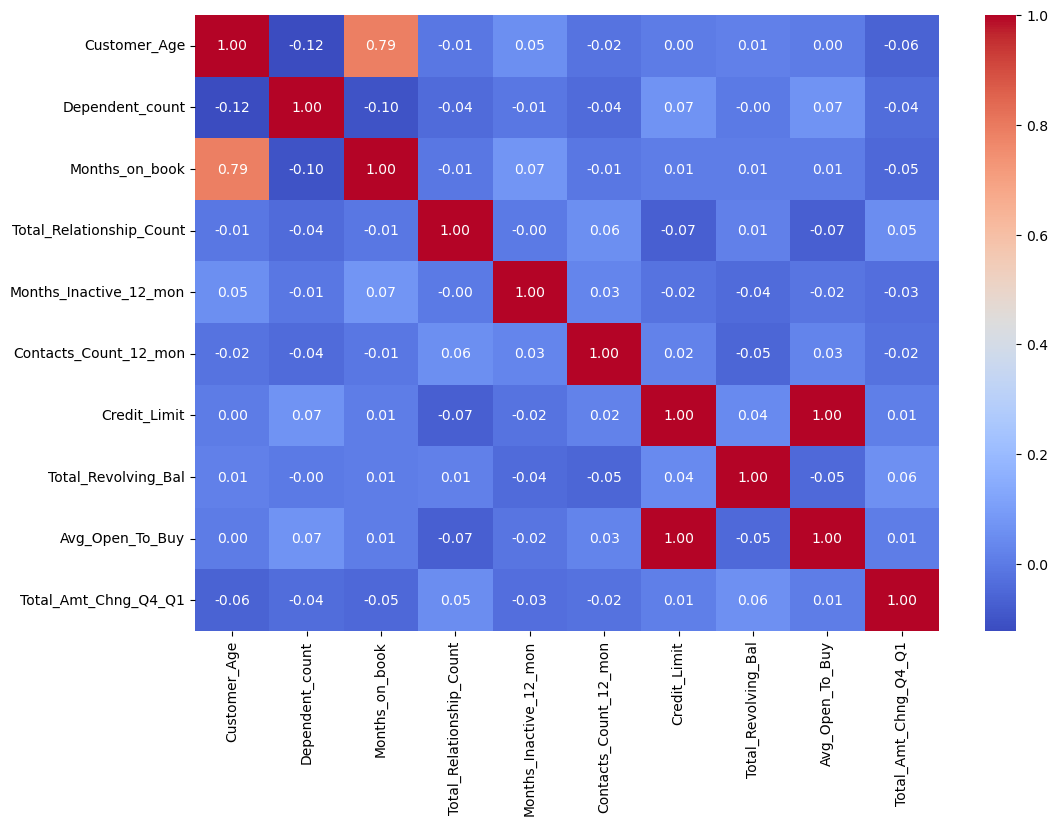

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


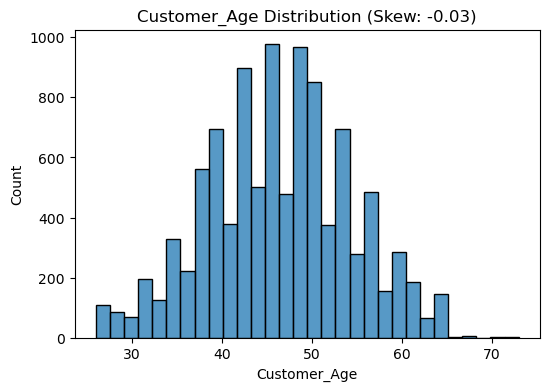

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


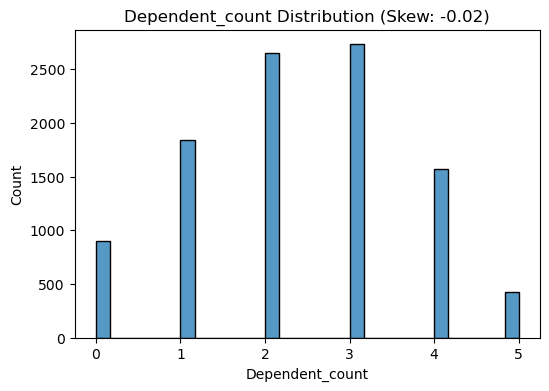

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


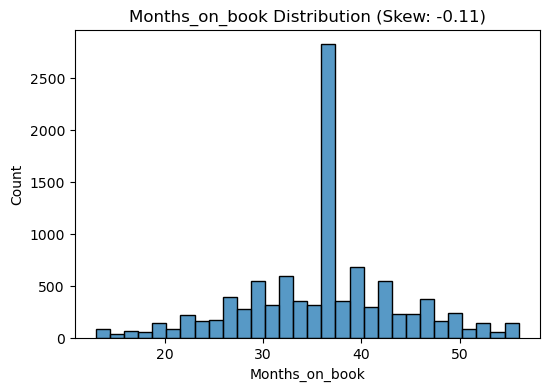

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


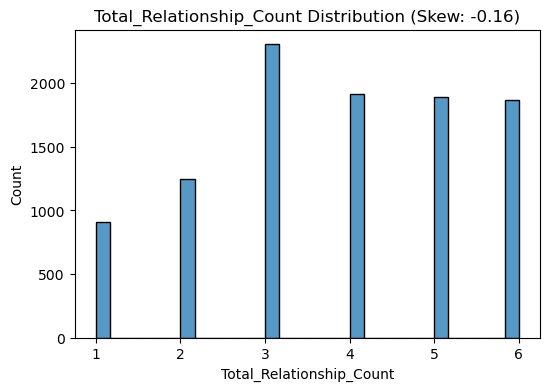

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


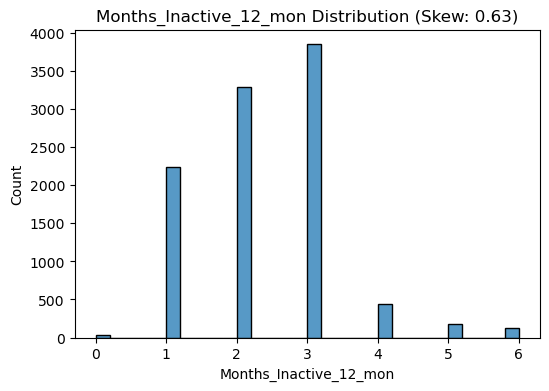

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


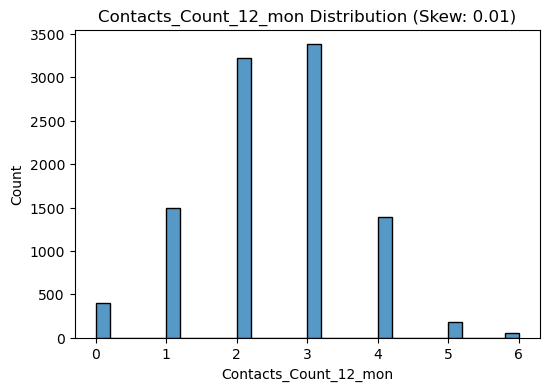

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


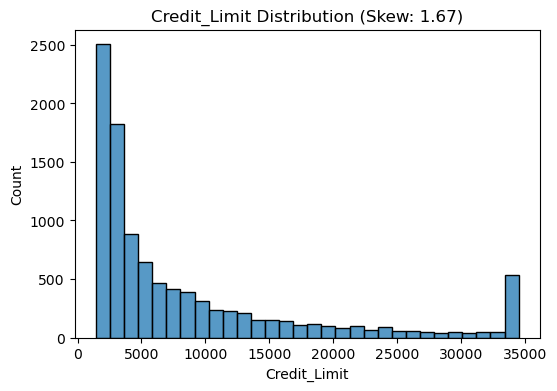

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


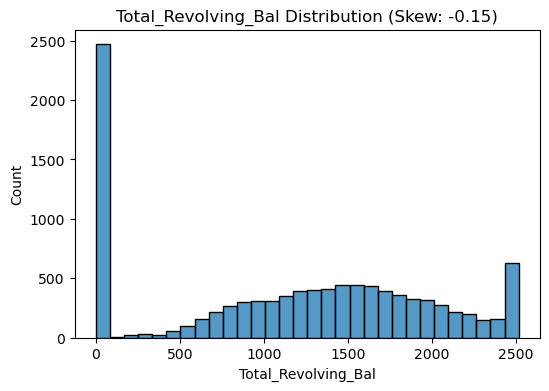

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


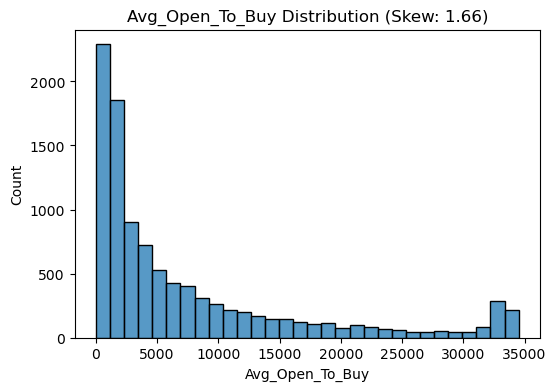

/var/folders/3c/ql33p8855rz89wgqw76szpt00000gn/T/ipykernel_61935/1277424389.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[col], kde=False, palette='viridis', bins=30)


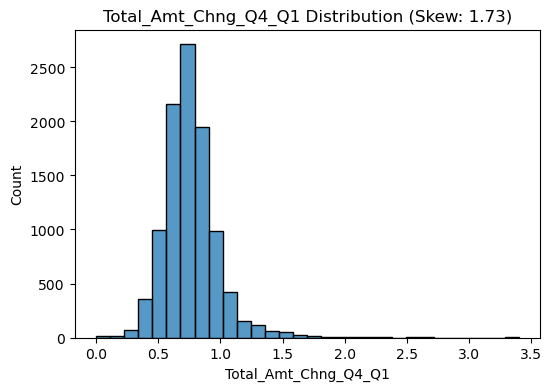

In [10]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('CLIENTNUM')  
numerical_features.remove('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
numerical_features.remove('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')
numerical_features = numerical_features[:-4]

corr = data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=False, palette='viridis', bins=30)
    plt.title(f'{col} Distribution (Skew: {data[col].skew():.2f})')
    plt.show()

The correlation between Months_on_book and Customer_Age is relatively high at 0.79, I will drop Months_on_book for the model, because to me they do not tell too different of a story. There is perfect linear relationship between Avg_Open_To_Buy and Credit_Limit, I will also drop the former for the Logistic Regression. Although Total_Trans_Amt and Total_Trans_Ct have a correlation of 0.81, I will drop neither of them because both still look meaningful to me (My hard threshhold for dropping is 0.85). Other correlations do not look too extreme, so there seems to be little multicollinearity issues here.

Most of our numerical features follow a normal distribution, with exception of 4 numerical features, 1 of which have been dropped due to collinearity (Avg_Open_To_Buy). Since we will be using Logistic Regression and Tree Ensemble, I will not log-transform the skewed variables

In [11]:
#Standardizing the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()




,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,-0.165406,M,0.503368,High School,Married,$60K - $80K,Blue,0.384621,...,0.446622,-0.473422,0.488971,2.623494,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,0.333570,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010715,...,-0.041367,-0.366667,-0.008486,3.563293,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,0.583058,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008965,...,-0.573698,-1.426858,-0.445658,8.367214,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,-0.789126,F,1.273283,High School,Unknown,Less than $40K,Blue,-0.241473,...,-0.585251,1.661686,-0.734100,2.942843,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,-0.789126,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.869317,...,-0.430877,-1.426858,-0.302868,6.455682,816,28,2.500,0.000,0.000022,0.99998


In [12]:
# Define ordinal mapping
education_order = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
data['Education_Level'] = data['Education_Level'].map(education_order)

income_order = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
data['Income_Category'] = data['Income_Category'].map(income_order)

card_order = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
data['Card_Category'] = data['Card_Category'].map(card_order)

#Create dummy variables for remaining nominal categorical features
nominal_features = ['Gender', 'Marital_Status']
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)




In [13]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,Existing Customer,-0.165406,0.503368,2,3,0,0.384621,0.763943,-1.327136,...,1144,42,1.625,0.061,0.000093,0.99991,1,1,0,0
1,818770008,Existing Customer,0.333570,2.043199,4,1,0,1.010715,1.407306,-1.327136,...,1291,33,3.714,0.105,0.000057,0.99994,0,0,1,0
2,713982108,Existing Customer,0.583058,0.503368,4,4,0,0.008965,0.120579,-1.327136,...,1887,20,2.333,0.000,0.000021,0.99998,1,1,0,0
3,769911858,Existing Customer,-0.789126,1.273283,2,1,0,-0.241473,-0.522785,1.641478,...,1171,20,2.333,0.760,0.000134,0.99987,0,0,0,1
4,709106358,Existing Customer,-0.789126,0.503368,1,3,0,-1.869317,0.763943,-1.327136,...,816,28,2.500,0.000,0.000022,0.99998,1,1,0,0


Part 3: Building classification models

First, I will build a preliminary classification model with logistic regression

In [14]:
#train-test split
X = data.drop(['Attrition_Flag', 'CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Avg_Open_To_Buy', 'Months_on_book'], axis=1)
y = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Logistic Regression Model with statsmodels
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.230903
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                 8101
Model:                          Logit   Df Residuals:                     8081
Method:                           MLE   Df Model:                           19
Date:                Sun, 04 Jan 2026   Pseudo R-squ.:                  0.4762
Time:                        22:27:48   Log-Likelihood:                -1870.5
converged:                       True   LL-Null:                       -3571.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.7272      0.281     16.846      0.000       4.177

In [15]:
y_pred_prob = result.predict(sm.add_constant(X_test))
y_pred = (y_pred_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.9008


In [16]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6338797814207651


I will tune the model a bit by dropping insignificant features, then refit to see if accuracy and f-1 score improves

In [17]:
pvalues = result.pvalues
print(pvalues)

insignificant_vars = pvalues[pvalues > 0.05].index.tolist()
print(insignificant_vars)

const                        1.116636e-63
Customer_Age                 2.100317e-01
Dependent_count              6.479513e-08
Education_Level              9.621321e-01
Income_Category              7.607655e-03
Card_Category                6.699656e-03
Total_Relationship_Count     1.114115e-54
Months_Inactive_12_mon       7.398716e-34
Contacts_Count_12_mon        1.707559e-36
Credit_Limit                 3.318377e-02
Total_Revolving_Bal          8.302756e-29
Total_Amt_Chng_Q4_Q1         6.143901e-02
Total_Trans_Amt              2.342849e-73
Total_Trans_Ct              3.440456e-176
Total_Ct_Chng_Q4_Q1          1.422576e-40
Avg_Utilization_Ratio        2.368376e-01
Gender_M                     1.992336e-11
Marital_Status_Married       7.274295e-02
Marital_Status_Single        1.194743e-01
Marital_Status_Unknown       1.882278e-01
dtype: float64
['Customer_Age', 'Education_Level', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_

In [18]:
#drop insignificant variables and refit the model
X_train_sm_reduced = X_train_sm.drop(columns=insignificant_vars)
logit_model_reduced = sm.Logit(y_train, X_train_sm_reduced)
result_reduced = logit_model_reduced.fit()
print(result_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.234036
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                 8101
Model:                          Logit   Df Residuals:                     8088
Method:                           MLE   Df Model:                           12
Date:                Sun, 04 Jan 2026   Pseudo R-squ.:                  0.4691
Time:                        22:27:49   Log-Likelihood:                -1895.9
converged:                       True   LL-Null:                       -3571.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.5682      0.201     22.687      0.000       4.174

All features show a statistically significant effect, except for Credit_Limit (p-value threshold 0.05). With the rest of the features, since this is a logistic regression, we exponentiate the coefficients to interpret their effect on the odds of churning. Because the numerical variables were standardized, a one-unit increase corresponds to a one standard deviation increase. For example, Dependent_count has e^2382 =1.27, meaning that a one standard deviation increase in Dependent_count is associated with a 27% increase in the odds of attrition, holding all other variables constant.

With non-standardized dummy variable like Gender_M, we still log the coefficient to see the effect. e^(0.9283) gives us 0.40, which tells us that Male customers have 60% lower odds of attrition comparing to female customers

In [19]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_test_sm = sm.add_constant(X_test)
X_test_sm_reduced = X_test_sm[X_train_sm_reduced.columns]
y_proba_reduced = result_reduced.predict(X_test_sm_reduced)
y_pred_reduced = (y_proba_reduced >= 0.5).astype(int)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Accuracy (reduced model):", accuracy_reduced)

cm_reduced = confusion_matrix(y_test, y_pred_reduced)
cm_table = pd.DataFrame(cm_reduced, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1'])
print("\nConfusion Matrix:\n", cm_table)


report_reduced = classification_report(y_test, y_pred_reduced, output_dict=True)
report_df_reduced = pd.DataFrame(report_reduced).transpose()
print("\nClassification Report:\n", report_df_reduced)

#f1 score
f1_reduced = f1_score(y_test, y_pred_reduced)
print("F1 Score (reduced model):", f1_reduced)


Accuracy (reduced model): 0.9017769002961501

Confusion Matrix:
           Pred 0  Pred 1
Actual 0    1653      48
Actual 1     151     174

Classification Report:
               precision    recall  f1-score      support
0              0.916297  0.971781  0.943224  1701.000000
1              0.783784  0.535385  0.636197   325.000000
accuracy       0.901777  0.901777  0.901777     0.901777
macro avg      0.850040  0.753583  0.789711  2026.000000
weighted avg   0.895040  0.901777  0.893972  2026.000000
F1 Score (reduced model): 0.6361974405850092


After tuning the logit model, we only improved it slightly to 0.9. With a baseline of 84/16 split between churners and non churners, meaning that a naive model predicting non-churn will succeed 84% of the time, this model is not good enough. I will carry on the analysis with the use of tree ensemble, in particular, Random Forest Classifier

In [20]:

rf_model = RandomForestClassifier(
    n_estimators=500,           
    max_depth=None,             
    min_samples_leaf=5,         
    class_weight='balanced',   
    random_state=42,            
    n_jobs=-1                   
)


# Stratified 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for F1 score
cv_f1_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=skf,
    scoring='f1'
)


# Cross-validation for ROC-AUC
cv_roc_auc_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=skf,
    scoring='roc_auc'
)

print("F1 score for each fold:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("ROC-AUC for each fold:", cv_roc_auc_scores)
print("Mean ROC-AUC:", cv_roc_auc_scores.mean())


rf_model.fit(X_train, y_train)
# Class predictions
y_pred_rf = rf_model.predict(X_test)

# Predicted probabilities 
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probability of Attrited Customer
# Accuracy
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf),
    index=['Actual 0', 'Actual 1'],
    columns=['Pred 0', 'Pred 1']
)
print("\nConfusion Matrix:\n", cm_rf)

# Classification report
report_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
print("\nClassification Report:\n", report_rf)

#f1 score
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1_rf)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_rf)
print("\nROC-AUC:", roc_auc)

#Recall and Precision
from sklearn.metrics import recall_score, precision_score
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)



F1 score for each fold: [0.89615385 0.86415094 0.86827458 0.88888889 0.84427767]
Mean F1 score: 0.8723491869090448
ROC-AUC for each fold: [0.99072008 0.98547794 0.98458145 0.99050905 0.98409919]
Mean ROC-AUC: 0.9870775428028778
RF Accuracy: 0.9521224086870681

Confusion Matrix:
           Pred 0  Pred 1
Actual 0    1647      54
Actual 1      43     282

Classification Report:
               precision    recall  f1-score      support
0              0.974556  0.968254  0.971395  1701.000000
1              0.839286  0.867692  0.853253   325.000000
accuracy       0.952122  0.952122  0.952122     0.952122
macro avg      0.906921  0.917973  0.912324  2026.000000
weighted avg   0.952857  0.952122  0.952443  2026.000000
F1 Score: 0.8532526475037822

ROC-AUC: 0.9847564780898114
Recall: 0.8676923076923077
Precision: 0.8392857142857143


Random Forest achieved a much higher Accuracy here at 0.95 and a ROC-AUC score of 0.98. The model successfully predicted 282 attrited customer, and missed 43 cases of churning customers. This figure existing customers are 1647 and 54 for TN and FP, respectively Looking at the Recall, we have a 86% rate of correctly identify a churner

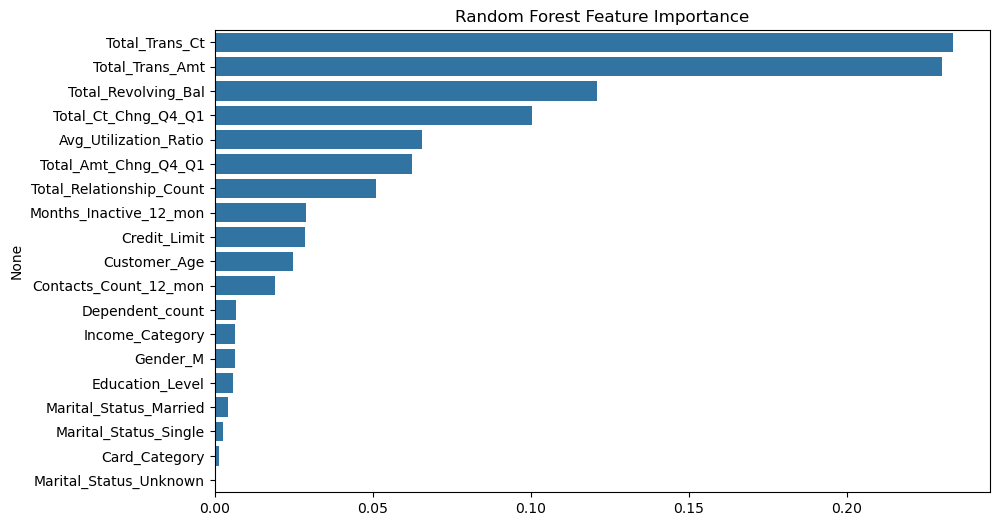

In [21]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Random Forest Feature Importance")
plt.show()

From the preliminary feature importance plot, we can see that the most important features has to do with the customer's usage of the credit card service (Transaction amount and count, Balance). This agree with domain knowlegde (No longer using service -> Churn)

Now I will introduce explanations for the AI Model, locally and globally, using Partial Dependence Plot and SHAPley Values Waterfall plot

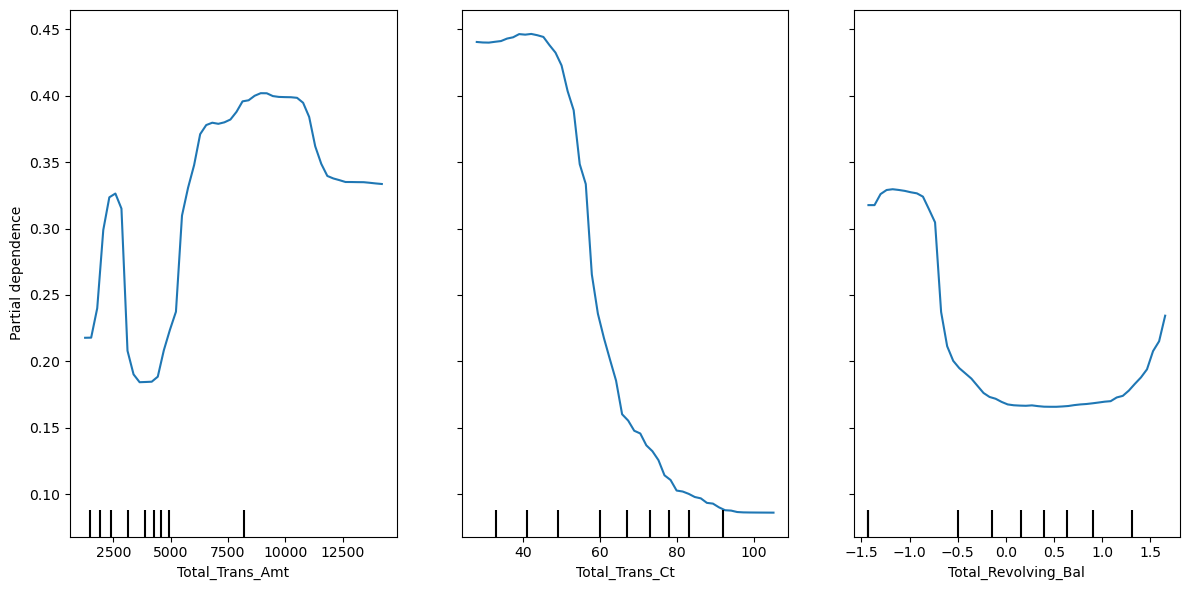

In [22]:
from sklearn.inspection import PartialDependenceDisplay

# Example: plot PDP for top features
top_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal'] 

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model, 
    X_train, 
    features=top_features,
    kind='average',  
    grid_resolution=50,
    ax=ax
)
plt.tight_layout()
plt.show()


The PDP plot show the global effects of these features in standardized units because i standardized all numerical values at the beginning. . The shape of the PDP is visible. For example for Total_Trans_Ct, we can see a steep drop from around 0.5 SD to the left of the mean, to the mean. The predicted churn probabilities dropped from 0.45 to around 0.15 when we vary this feature.

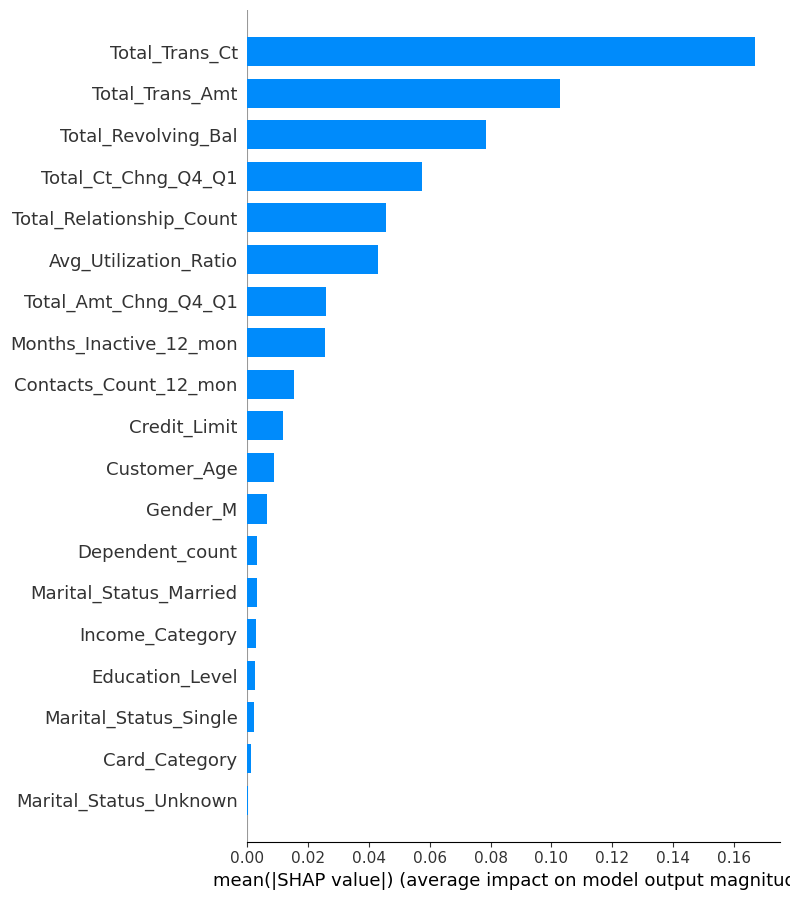

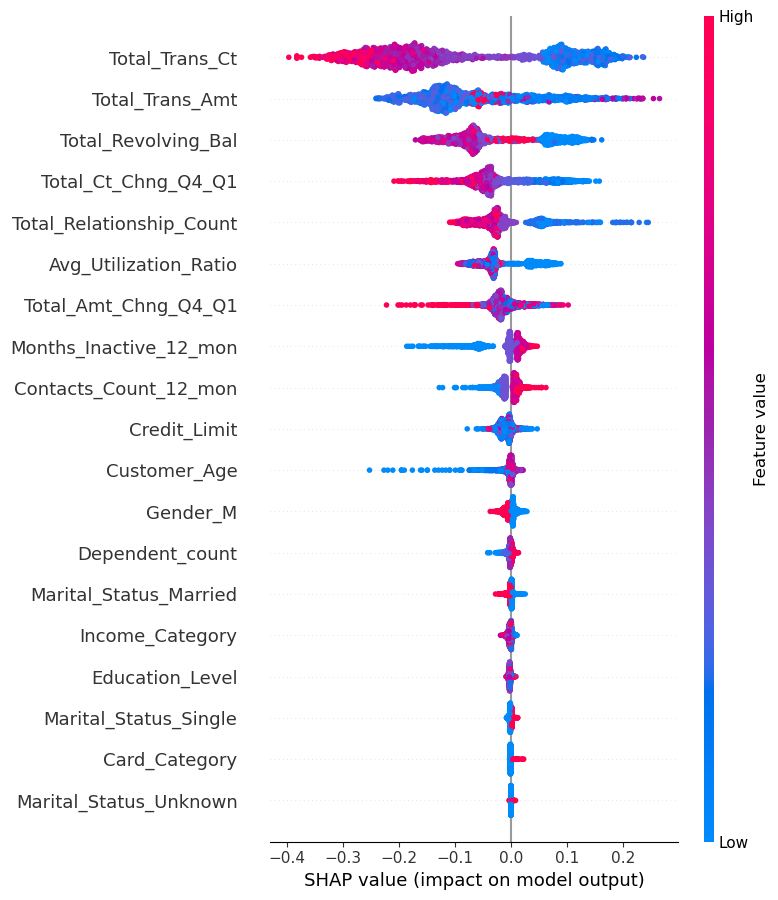

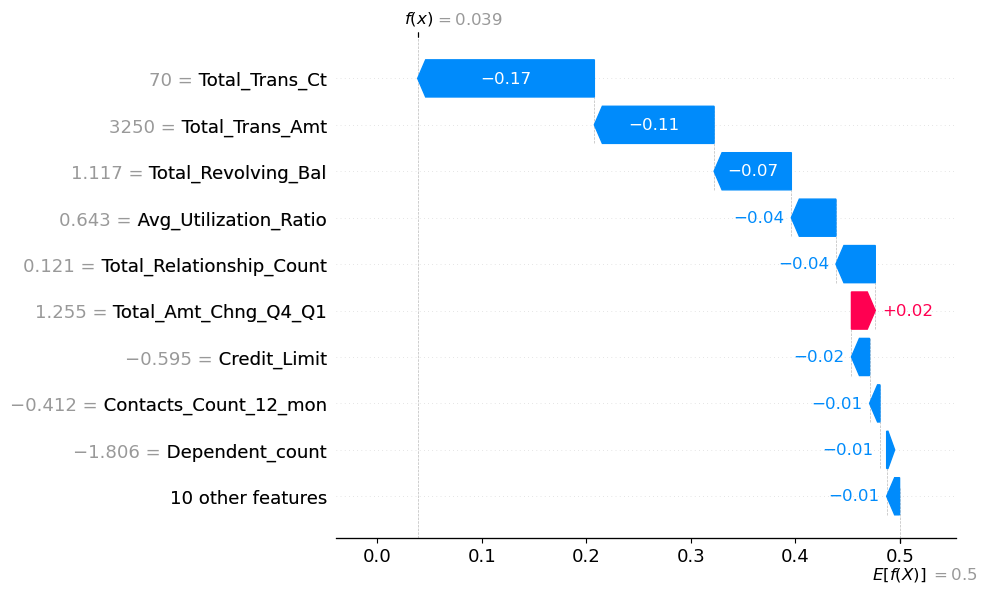

In [23]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")
shap.summary_plot(shap_values[:, :, 1], X_test)
shap.initjs()

i = 0  

shap_expl_single = shap.Explanation(
    values=shap_values.values[i, :, 1],
    base_values=shap_values.base_values[i, 1],
    data=X_test.iloc[i],
    feature_names=X_test.columns
)

shap.plots.waterfall(shap_expl_single)



From the global aggregated SHAP value barplot, on average, transaction count contributes about 18 percentage points to churn probability predictions, making it the most influential feature

From this waterfall plot of the local observation, we can see the feature contributions in terms of percentage points and their direction. For example, Total_Trans_Ct contributes 17 percentage point towards the predicted probability of 3.9% of this observation, comparing to the baseline average 50% churn prediction across all observations.